In [15]:
from HopDec.State import readStateLAMMPSDump
from HopDec.Input import getParams
from HopDec.Lammps import *
import HopDec.NEB as neb
import HopDec.Redecorate as red

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
params = getParams()

In [3]:
# load all frames of the dump as State objects
states = readStateLAMMPSDump('example.dump',params)
states

In [4]:
connectionList = []
for i in range(len(states) - 1):
    
    init = states[i]
    fin = states[i+1]

    lmp = LammpsInterface(params)
    lmp.minimize(init, verbose = True)
    lmp.minimize(fin, verbose = True)

    connection = neb.main(init, fin, params, verbose = True)

    print(f'Completed Frame {i}->{i+1}')

    connectionList.append(connection)

[20/02/24, 09:49:27]:   Lammps >> Minimizing. F Tol: 1e-05.
[20/02/24, 09:49:28]: Lammps >> Completed Minimization, E: -8530.9586 eV
[20/02/24, 09:49:28]:   Lammps >> Minimizing. F Tol: 1e-05.
[20/02/24, 09:49:30]: Lammps >> Completed Minimization, E: -8531.7104 eV
[20/02/24, 09:49:30]: NEB >> Minimizing End Points
[20/02/24, 09:49:30]:   Lammps >> Minimizing. F Tol: 1e-05.
[20/02/24, 09:49:30]: Lammps >> Completed Minimization, E: -8530.9586 eV
[20/02/24, 09:49:30]:   Lammps >> Minimizing. F Tol: 1e-05.
[20/02/24, 09:49:30]: Lammps >> Completed Minimization, E: -8531.7104 eV
[20/02/24, 09:49:47]: NEB >> Initializing ASE Structure
[20/02/24, 09:49:47]: NEB >> Interpolating 11 images
[20/02/24, 09:49:47]: NEB >> Performing NEB. Force Tol: 0.1, Transition:
        b1e75ab224126967075347cd7c90a396 -> 6b8fcd35b7e71e8ae115677a46e6500f
[20/02/24, 09:50:07]: NEB >> NEB finished Successfully. Extracting Results
[20/02/24, 09:50:07]: NEB >> Checking NEB path for integrity
[20/02/24, 09:50:07]: 

In [5]:
for c,connection in enumerate(connectionList):
    connection.exportStructures(folder = f'connection_{c}')

In [6]:
connectionList[0].transitions[0].forwardBarrier

0.1706

In [12]:
redecResults = red.main(connectionList[0].transitions[0].initialState, connectionList[0].transitions[0].finalState, params, pickle = False)

[20/02/24, 10:19:00]: Redecorate >> Starting NEB Redecoration Campaign
[20/02/24, 10:19:00]:   Redecorate >> rank: 0: Redecoration: 1
[20/02/24, 10:19:38]:   Redecorate >> rank: 0: Redecoration: 2
[20/02/24, 10:20:10]:   Redecorate >> rank: 0: Redecoration: 3
[20/02/24, 10:20:42]:   Redecorate >> rank: 0: Redecoration: 4
[20/02/24, 10:22:54]:   Redecorate >> rank: 0: Redecoration: 5
[20/02/24, 10:23:24]:   Redecorate >> rank: 0: Redecoration: 6
[20/02/24, 10:23:56]:   Redecorate >> rank: 0: Redecoration: 7
[20/02/24, 10:24:26]:   Redecorate >> rank: 0: Redecoration: 8
[20/02/24, 10:25:01]:   Redecorate >> rank: 0: Redecoration: 9
[20/02/24, 10:25:32]:   Redecorate >> rank: 0: Redecoration: 10


In [13]:
redecResults.summarize()

[20/02/24, 10:26:03]: Redecorate >> Summary:
	Connection 1:
		Transition 1:
			transition.KRA = 0.2825
			transition.dE = 0.3892
	Connection 2:
		Transition 1:
			transition.KRA = 0.3572
			transition.dE = 0.2251
	Connection 3:
		Transition 1:
			transition.KRA = 0.1368
			transition.dE = -0.1373
	Connection 4:
		Transition 1:
			transition.KRA = 0.4744
			transition.dE = -0.4935
		Transition 2:
			transition.KRA = 0.553
			transition.dE = 0.0387
		Transition 3:
			transition.KRA = 0.5324
			transition.dE = 0.4511
	Connection 5:
		Transition 1:
			transition.KRA = 0.3058
			transition.dE = 0.3811
	Connection 6:
		Transition 1:
			transition.KRA = 0.2979
			transition.dE = 0.335
	Connection 7:
		Transition 1:
			transition.KRA = 0.237
			transition.dE = 0.0525
	Connection 8:
		Transition 1:
			transition.KRA = 0.1182
			transition.dE = -0.1103
	Connection 9:
		Transition 1:
			transition.KRA = 0.2768
			transition.dE = -0.4678
	Connection 10:
		Transition 1:
			transition.KRA = 0.2909
	

(array([3., 0., 1., 1., 0., 2., 2., 2., 0., 1.]),
 array([0.0429, 0.1144, 0.1859, 0.2574, 0.3289, 0.4004, 0.4719, 0.5434,
        0.6149, 0.6864, 0.7579]),
 <BarContainer object of 10 artists>)

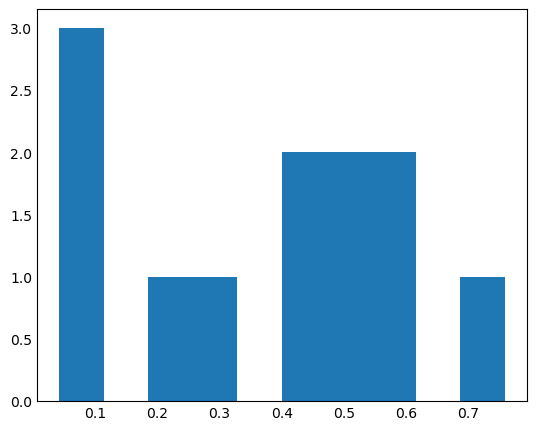

In [18]:
fig, axs = plt.subplots(1, 1, figsize = (5,4))
axs.hist([ tran.forwardBarrier for conn in redecResults.connections for tran in conn.transitions ])
